In [1]:
# import required libraries
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the csv file 
Data = pd.read_csv("House-Price-Prediction-clean.csv")
Data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [3]:
Data.head(5).T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
LotArea,8450,9600,11250,9550,14260
OverallQual,7,6,7,7,8
OverallCond,5,8,5,5,5
YearBuilt,2003,1976,2001,1915,2000
YearRemodAdd,2003,1976,2002,1970,2000
BsmtFinSF1,706,978,486,216,655
BsmtUnfSF,150,284,434,540,490
TotalBsmtSF,856,1262,920,756,1145


In [4]:
#get some information about our DataSet
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  GrLivArea      1460 non-null   int64
 13  BsmtFullBath   1460 non-null   int64
 14  FullBath       1460 non-null   int64
 15  HalfBath       1460 non-null   int64
 16  BedroomAbvGr   1460 non-null   int64
 17  KitchenAbvGr   1460 non-null   int64
 18  TotRmsAbvGrd   1460 non-null   int64
 19  Firepl

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


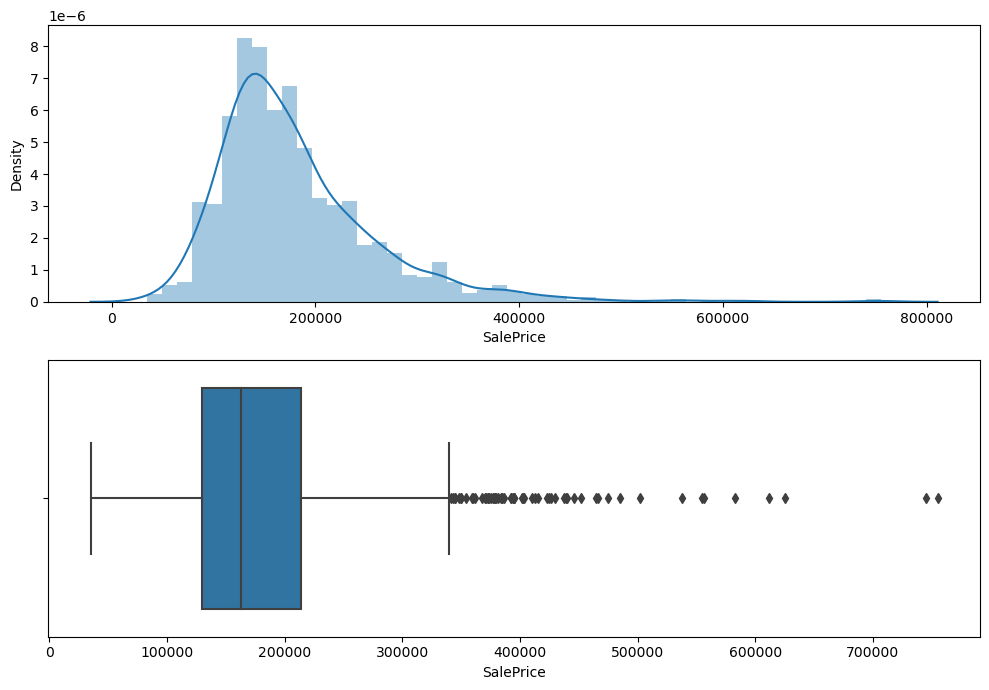

In [5]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['SalePrice'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['SalePrice'])
plt.tight_layout()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

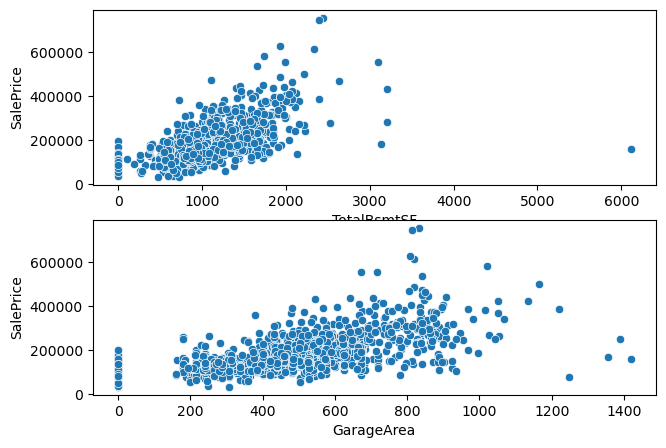

In [6]:
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['TotalBsmtSF'], Data['SalePrice'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['GarageArea'],Data['SalePrice'])


In [3]:
#splitting Train and Test 
X = Data.drop('SalePrice',axis =1).values
y = Data['SalePrice'].values
# changed random state to 0  and split to 80:20
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [8]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

C:\Users\User\AppData\Local\Temp\ipykernel_3420\797503184.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
C:\Users\User\AppData\Local\Temp\ipykernel_3420\797503184.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform(X_test.astype(np.float))


In [9]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([  -351.60617963,  -5350.4167302 ,   3773.78626151,  21976.68258463,
         5252.16030379,  10509.82264397,   3825.35078007,   8450.54047713,
        -1513.4657859 ,   9531.37134018,  23025.0418655 ,  26799.80923192,
        -2401.69644328,    978.35926893,   -630.09661615,     95.04574829,
       -10092.08899411,  -4012.49243376,  10690.90855473,    843.30348011,
         4614.15085819,   3404.96878137,   1168.26748849,    -26.9599446 ,
         -290.3289716 ,    415.84296202,    847.9522177 ,   2514.30697124,
        -1368.60087728,    649.43229012,    -71.13208321])

In [10]:
y_predd = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
0,255000,269997.046131
1,145000,145709.025707
2,150500,148018.817723
3,412500,368264.798973
4,402861,366109.934774
5,113000,96748.749002
6,136000,114405.127288
7,144152,143163.458496
8,145250,167905.163349
9,135000,151209.362800


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

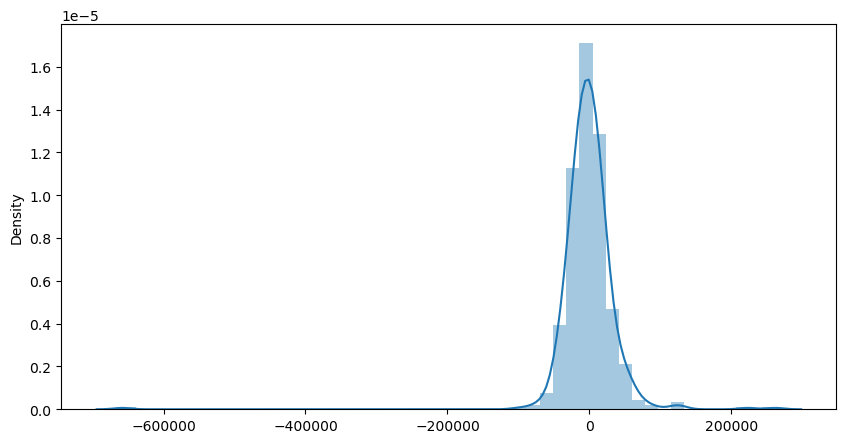

In [11]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_predd)
sns.distplot(residuals)

In [12]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

Mean Absolute Error: 21843.91
Mean Squared Error:1781862018.96
Root Mean Squared Error:42212.11
Variance score is: 0.70


In [13]:
# we are off about 20% (comparing mean absolut error and mean of price)
Data['SalePrice'].mean()

180921.19589041095

In [14]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.84
Test Score 0.70


In [5]:
#Keras Regression
# Creating a Neural Network Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics


In [6]:
# having 19 nueron is based on the number of available featurs

model = Sequential()
# classifier.add(Dense(input_dim =32, units =6, kernel_initializer ='uniform', activation ='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))
# classifier.add(Dense(units =1, kernel_initializer ='uniform', activation ='sigmoid'))
# classifier.compile(optimizer='adam',loss='mse',metrics=[tf.keras.metrics.Accuracy()])
# classifier.summary()        

# sgd = SGD(lr=0.01)
model.compile(optimizer='adam',loss='mse',metrics=[tf.keras.metrics.Accuracy()])

In [ ]:
17517696
6049280

In [24]:
model.fit(x=X_train,y=y_train,
          batch_size=19,epochs=250)

Epoch 1/250
66/66 [==============================] - 0s 3ms/step - loss: 361831232.0000 - accuracy: 0.0000e+00
Epoch 2/250
66/66 [==============================] - 0s 3ms/step - loss: 400071680.0000 - accuracy: 0.0000e+00
Epoch 3/250
66/66 [==============================] - 0s 3ms/step - loss: 361989184.0000 - accuracy: 0.0000e+00
Epoch 4/250
66/66 [==============================] - 0s 3ms/step - loss: 397540832.0000 - accuracy: 0.0000e+00
Epoch 5/250
66/66 [==============================] - 0s 5ms/step - loss: 380906176.0000 - accuracy: 0.0000e+00
Epoch 6/250
66/66 [==============================] - 0s 4ms/step - loss: 399343008.0000 - accuracy: 0.0000e+00
Epoch 7/250
66/66 [==============================] - 0s 3ms/step - loss: 389866176.0000 - accuracy: 0.0000e+00
Epoch 8/250
66/66 [==============================] - 0s 3ms/step - loss: 406372736.0000 - accuracy: 0.0000e+00
Epoch 9/250
66/66 [==============================] - 0s 3ms/step - loss: 369296576.0000 - accuracy: 0.0000e+00
E

In [72]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 32)                1024      
_________________________________________________________________
dense_52 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_53 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_54 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 33        
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________


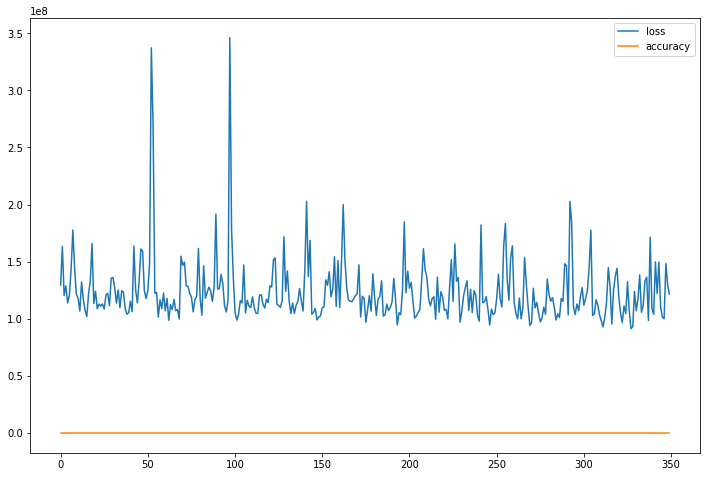

In [136]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [25]:
y_pred = model.predict(X_test)

In [26]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 20637.36
Mean Squared Error: 973977049.77
Root Mean Squared Error: 31208.61
Variance score is: 0.85


In [ ]:
Data['SalePrice'].mean()

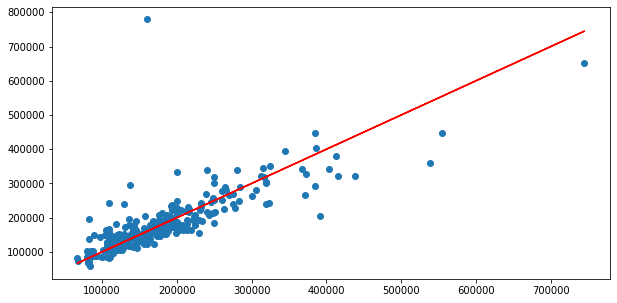

In [44]:
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [ ]:
single_house = Data.drop('SalePrice',axis = 1).iloc[0]

In [ ]:
single_house = s_scaler.transform(single_house.values.reshape(-1,31))

In [ ]:
model.predict(single_house)

In [ ]:
Data['SalePrice'][0]

In [46]:
print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)*100))

Model: Keras Regression

Mean Absolute Error(MAE): 26537.59
Mean Squared Error(MSE): 2708732938.50
Root Mean Squared Error(RMSE): 52045.49
Variance score: 60.78

*********************************

Model: Multiple Linear Regression



NameError: name 'y_predd' is not defined